In [662]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random

In [663]:
bdf = pd.read_csv('banana_quality.csv',sep=',')
bdf.head()  

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good


In [664]:
bdf_train,bdf_val = train_test_split(bdf, test_size=0.25, random_state=50)
bdf_val,bdf_test = train_test_split(bdf_val, test_size=0.4, random_state=50)

bdf_train['Quality'] = bdf_train['Quality'].map({'Good':0,'Bad':1})
bdf_val['Quality'] = bdf_val['Quality'].map({'Good':0,'Bad':1})  
bdf_test['Quality'] = bdf_test['Quality'].map({'Good':0,'Bad':1})

In [665]:
X_train = bdf_train.drop('Quality',axis=1)
y_train = bdf_train['Quality']
X_test = bdf_test.drop('Quality',axis=1)
y_test = bdf_test['Quality']

print(X_train.shape)
print(y_train.shape)

#these are the features

(6000, 7)
(6000,)


In [ ]:
#preprocessing

X_train_values = X_train.values #converts the dataframe to a numpy array
X_test_values = X_test.values

def X_train_values_means(values): #means of each feature of X_train
    return np.mean(values,axis=0) #computes the mean of each feature (columns) of X_train, 7 means

def X_train_values_stds(values): #standard deviations of each feature of X_train
    return np.std(values,axis=0) #computes the standard deviation of each feature (columns) of X_train, 7 stds

def X_train_standardize(values,means,stds): #we need to get back a matrix with 6000 rows and 7 columns
    return (values - means)/stds #standardizes the values of X_train, 6000 rows and 7 columns

X_train_means = X_train_values_means(X_train_values)
X_train_stds = X_train_values_stds(X_train_values)
X_test_means = X_train_values_means(X_test_values)
X_test_stds = X_train_values_stds(X_test_values)

X_train_standardized = np.array(X_train_standardize(X_train_values,X_train_means,X_train_stds)) #np.array gives it back shape, now we will use this to train the model
X_test_standardized = np.array(X_train_standardize(X_test_values,X_train_means,X_train_stds)) #THIS FUNCTION HAS TO USE TRAINING MEANS AND STDS

#axis=0 means that we are taking the mean of each column
#axis=1 means that we are taking the mean of each row

print(X_train_values_means(X_train_values)) #7 elements for the seven columns (features)
print(X_train_values_stds(X_train_values)) #7 elements for the seven columns (features)

#Brief Explanation: The first element of X_train_values_means subtracts the all of the elements in the first column (feature) of X_train_values, and so on.

def X_train_values_mins(values):
    return np.min(values,axis=0)

def X_train_values_maxs(values):
    return np.max(values,axis=0)

def X_train_normalize(values,mins,maxs):
    return (values - mins)/(maxs-mins)

X_train_mins = X_train_values_mins(X_train_values)
X_train_maxs = X_train_values_maxs(X_train_values)
X_test_mins = X_train_values_mins(X_test_values)
X_test_maxs = X_train_values_maxs(X_test_values)

X_train_normalized = np.array(X_train_normalize(X_train_values,X_train_mins,X_train_maxs))
X_test_normalized = np.array(X_train_normalize(X_test_values,X_train_mins,X_train_maxs))

[-0.75585987 -0.74796725 -0.75914529 -0.0256556  -0.75507141  0.78871578
  0.02041086]
[2.13083064 2.01821564 1.95789274 2.05738112 1.99695628 2.08916899
 2.30308172]


In [ ]:
def m_ridge(X,t,lam):
    X = np.concatenate((np.ones((X.shape[0],1)),X),axis=1) #including bias
    I = np.eye(X.shape[1]) #identity matrix thats the same size as X
    return np.linalg.inv((lam*I) + X.T @ X)@X.T@t

w_rML = m_ridge(X_train_standardized,y_train,0.00001)

def r_sse(w,x,t,lam):
    x = np.concatenate((np.ones((x.shape[0],1)),x),axis=1) #including bias
    return (1/2)*np.sum((t - x@w)**2) + (1/2)*np.sum(lam*w.T@w) #ridge regression

def pred(w,x):
    x = np.concatenate((np.ones((x.shape[0],1)),x),axis=1) #including bias
    return x@w #returns the prediction

def rmse(w,x,t,lam,N):
    return np.sqrt(2*(r_sse(w,x,t,lam)/N)) #root mean squared error

pred_train = np.round(pred(w_rML,X_train_standardized))
pred_test = np.round(pred(w_rML,X_test_standardized))
rmse_train = rmse(w_rML,X_train_standardized,y_train,0.00001,len(y_train))
rmse_test = rmse(w_rML,X_test_standardized,y_test,0.00001,len(y_test))

pred_train_norm = np.round(pred(w_rML,X_test_normalized))
pred_test_norm = np.round(pred(w_rML,X_test_normalized))
rmse_train_norm = rmse(w_rML,X_train_normalized,y_train,1,len(y_train))
rmse_test_norm = rmse(w_rML,X_test_normalized,y_test,1,len(y_test)) #normalization isn't better in this case so we will use standardization

print(rmse_train)
print(rmse_test)
print(rmse_train_norm)
print(rmse_test_norm)

def pred_fix(pred):
    for i in range(len(pred)):
        if pred[i] < 0:
            pred[i] = 0
        elif pred[i] > 1:
            pred[i] = 1
    return pred


0.328155594857299
0.3291845717382792
0.5839524204686241
0.5921536415832379


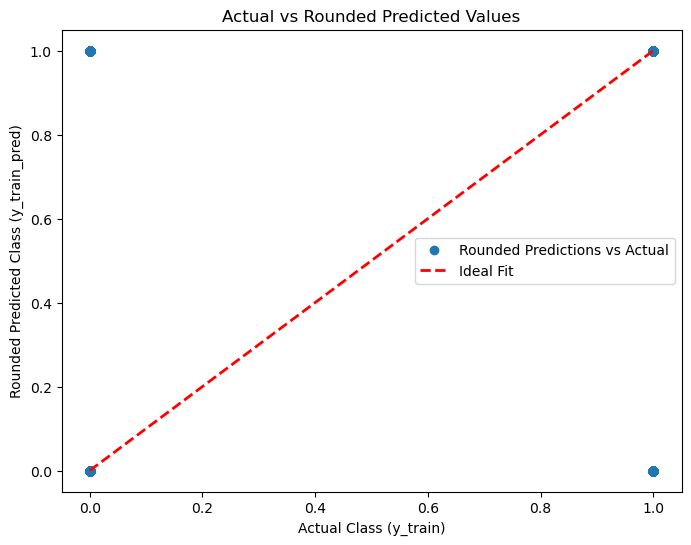

In [668]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train, pred_fix(pred_train), label="Rounded Predictions vs Actual")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2, label="Ideal Fit")
plt.xlabel("Actual Class (y_train)")
plt.ylabel("Rounded Predicted Class (y_train_pred)")
plt.title("Actual vs Rounded Predicted Values")
plt.legend()
plt.show()

In [669]:
test_mistmatch = np.where(y_test != pred_fix(pred_test))[0]
train_mistmatch = np.where(y_train != pred_fix(pred_train))[0]

percentage1 = np.round(100-((len(test_mistmatch)/len(y_test))*100))
percentage2 = np.round(100-((len(train_mistmatch)/len(y_train))*100))

print(f'The percentage of correct predictions in the test set is {percentage1}%')
print(f'The percentage of correct predictions in the train set is {percentage2}%')

print(len(test_mistmatch), "mismatches in the test set")
print(len(train_mistmatch), "mismatches in the train set")

The percentage of correct predictions in the test set is 88.0%
The percentage of correct predictions in the train set is 88.0%
99 mismatches in the test set
708 mismatches in the train set


In [670]:
y_train_values = y_train.values #dont forget to convert the table to a numpy array
y_test_values = y_test.values

def lms(w,x,t,nab,lam=0.0001):
    X = np.concatenate((np.ones((x.shape[0],1)),x),axis=1) #including bias
    I = np.eye(X.shape[1]) #identity matrix thats the same size as X
    for i in range(0,len(t)):
        n = random.randint(0,len(t)-1) #as said in the lecture notes, we need to shuffle the data
        w = w + (nab*(((t[n] - w.T@X[n])*X[n])+lam*w)) #this is the LMS update rule
    return w

#print(lms(w_rML,X_train_standardized,y_train_values,0.01)) #this is the final weight vector

lms_train = lms(w_rML,X_train_standardized,y_train_values,0.00001)
lms_test = lms(w_rML,X_test_standardized,y_test_values,0.00001)

pred_train_lms = np.round(pred(lms_train,X_train_standardized))
pred_test_lms = np.round(pred(lms_test,X_test_standardized))

train_lms_mistmatch = np.where(y_train != pred_fix(pred_train_lms))[0]
test_lms_mistmatch = np.where(y_test != pred_fix(pred_test_lms))[0]

percentage3 = np.round(100-((len(test_lms_mistmatch)/len(y_test))*100))
percentage4 = np.round(100-((len(train_lms_mistmatch)/len(y_train))*100))

print(f'The percentage of correct predictions in the test set is {percentage3}%')
print(f'The percentage of correct predictions in the train set is {percentage4}%')

rmse_test_lms = rmse(lms_test,X_test_standardized,y_test,0.00001,len(y_test))
rmse_train_lms = rmse(lms_train,X_train_standardized,y_train,0.00001,len(y_train))

print(rmse_train_lms)
print(rmse_test_lms)
print(len(test_lms_mistmatch), "mismatches in the test set")
print(len(train_lms_mistmatch), "mismatches in the train set")


The percentage of correct predictions in the test set is 88.0%
The percentage of correct predictions in the train set is 88.0%
0.32815637154071026
0.32908756155563335
99 mismatches in the test set
707 mismatches in the train set
